---
![kku-logo.svg](attachment:kku-logo.svg)

<div align="center">
    
# Department of Information system
## College of Computer science, King Khalid University
## Abha, Kingdom of Saudi Arabia
## Academic Year 2022-2023 Semester 2
### Machine Learning Assignment 2 part 1
</div>

---

# Regression

### Importing libraries & data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set()
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_csv('House price prediction.csv')

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
#see how many rows and columns
rows = len(df.axes[0])
col = len(df.axes[1])
print("number of rows = ",rows)
print("number of columns = ",col)


number of rows =  4600
number of columns =  18


In [ ]:
# information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### For each continuous kindly visualize the univariate distribution. Visualize the distribution of the target. Have you found something that need to be treated?

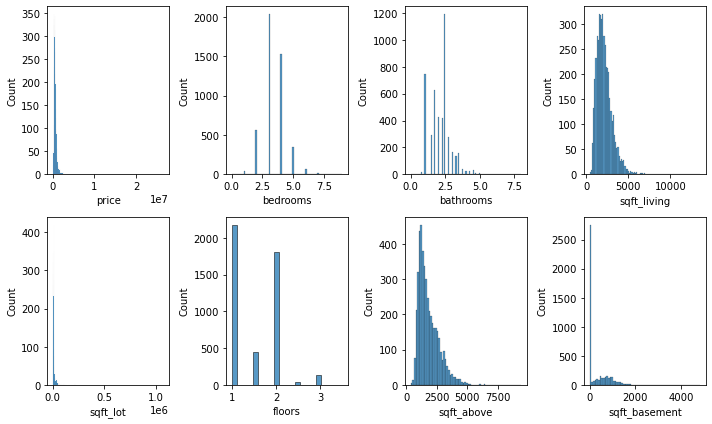

In [ ]:
#plot continuous variables using seborn
plt.figure(figsize=(10,6))
ax1 = plt.subplot(2,4,1)
sns.histplot(data=df, x='price', ax=ax1)
ax2 = plt.subplot(2,4,2)
sns.histplot(data=df, x='bedrooms', ax=ax2)
ax3 = plt.subplot(2,4,3)
sns.histplot(data=df, x='bathrooms', ax=ax3)
ax4 = plt.subplot(2,4,4)
sns.histplot(data=df, x='sqft_living', ax=ax4)
ax5 = plt.subplot(2,4,5)
sns.histplot(data=df, x='sqft_lot', ax=ax5)
ax6 = plt.subplot(2,4,6)
sns.histplot(data=df, x='floors', ax=ax6)
ax7 = plt.subplot(2,4,7)
sns.histplot(data=df, x='sqft_above', ax=ax7)
ax8 = plt.subplot(2,4,8)
sns.histplot(data=df, x='sqft_basement', ax=ax8)
plt.tight_layout()

#### The target featuer price and another featuers need to treatment because are skewed  

In [ ]:
# I found some features need to change the type
# waterfront is binary Categorical Variables
df['waterfront'].unique()

array([0, 1], dtype=int64)

In [ ]:
# view is Ordinal Categorical Variables
df['view'].unique()

array([0, 4, 1, 2, 3], dtype=int64)

In [ ]:
#convet waterfront and view to object
df['waterfront'] = df['waterfront'].astype('object')
df['view'] = df['view'].astype('object')

### Using 2d scatter plot, plot the dependency of the target on each continuous feature.

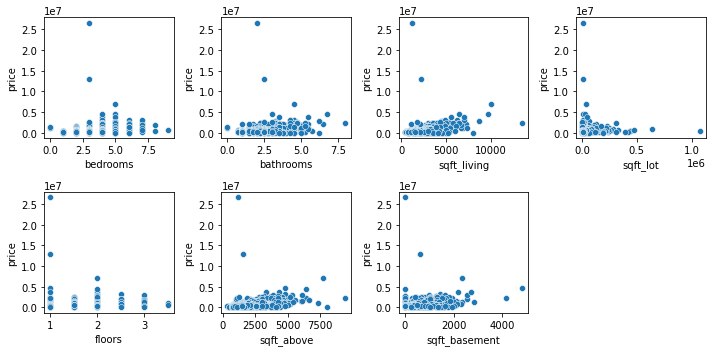

In [ ]:
# plot continuous with target price
plt.figure(figsize=(10,5))
ax1 = plt.subplot(2,4,1)
sns.scatterplot(data=df, x="bedrooms", y="price",ax=ax1)
ax2 = plt.subplot(2,4,2)
sns.scatterplot(data=df, x="bathrooms", y="price",ax=ax2)
ax3 = plt.subplot(2,4,3)
sns.scatterplot(data=df, x="sqft_living", y="price",ax=ax3)
ax4 = plt.subplot(2,4,4)
sns.scatterplot(data=df, x="sqft_lot", y="price",ax=ax4)
ax5 = plt.subplot(2,4,5)
sns.scatterplot(data=df, x="floors", y="price",ax=ax5)
ax6 = plt.subplot(2,4,6)
sns.scatterplot(data=df, x="sqft_above", y="price",ax=ax6)
ax7 = plt.subplot(2,4,7)
sns.scatterplot(data=df, x="sqft_basement", y="price",ax=ax7)
plt.tight_layout()

### Split data in training and test set. Try don’t use the test-set unless for a final evaluation in 9.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# drop the target price
X = df.drop('price',axis=1)
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
# assign target to y
y = df['price']
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

### Try cross-validate a Linear Regression model using just this variable using one-hot-encoded for each categorical variable.

In [ ]:
# import the selector to select the categorical columns
from sklearn.compose import make_column_selector as selector

In [ ]:
# process to select categorical columns
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train)
categorical_columns

['date', 'waterfront', 'view', 'street', 'city', 'statezip', 'country']

In [ ]:
# import the libray need to deal with categorical variable
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# one hot encoder processor
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

# fit_transform or transform. The output of this step is a set of categorical variable.
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)])

In [ ]:
# import LinearRegression and make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Pipeline use to combine the ColumnTransformer and LinearRegression
# pipeline is to assemble several steps that can be cross-validated together
model = make_pipeline(preprocessor, LinearRegression())


In [ ]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

# result score of 5 folds
cv_results = cross_val_score (model, X_train, y_train, cv=5 , error_score="raise")
cv_results

array([0.42606103, 0.38628332, 0.17855583, 0.40536251, 0.41684151])

### What is the relationship of the categorical variables that provide the best R^2 value with the target (Better to visualize).

In [ ]:
# build function take list of variables with list of R^2 of each variables
# Return a dictionary with variable name as key, corresponding R^2 as value.

def R(variables:list):
    R2_score = {}
    for i in variables:
        #create one-hot encoding
        cat_variables = X_train[i]
        X_train_encod = pd.get_dummies(cat_variables)
        #fit linear regression
        reg = LinearRegression().fit(X_train_encod, y_train)
        #cross-validation to caculate R^2
        train_scores = cross_val_score(reg, X_train_encod, y_train, cv=10 ,scoring='r2')
        mean_R2 = np.mean(train_scores)
        R2_score[i] = mean_R2
    return R2_score

In [ ]:
# we want to convert categorical variables to list
# take all categorical variables from  data
categorical = df.dtypes == object

#return the contents of column as list
col  = df.columns.tolist()

# convert categorical variables to list
cat_to_list = categorical.tolist()

# if categorical variables take the contents form the column and add to categorical_list
categorical_list = []
i=0
for item in cat_to_list:
    if item == True:
        categorical_list.append(col[i])
    i+=1

In [ ]:
# pass the categorical_list to function to calculate the R^2
R2_score = R(categorical_list)
# show the result of R^2 for each categorical variable
R2_score

{'date': -3.406416684267697e+23,
 'waterfront': 0.013098613792509461,
 'view': 0.11993801613920288,
 'street': -2.5286145659857577e+26,
 'city': -2.8455394622179114e+23,
 'statezip': -1.1056927345163043e+24,
 'country': -0.002994772536477974}

In [ ]:
# show the best score for categorical variable by using sorted(iterable, key=key, reverse=reverse) function
# stored the R2_score sequence to sort list in best_R ,the sort iterates over the dictionary keys,
#using the number of word occurrences as a sort key,True will sort descending
best_R = sorted(R2_score, key=R2_score.get, reverse=True)[:3]
for i in best_R:
    print(i,R2_score[i])

view 0.11993801613920288
waterfront 0.013098613792509461
country -0.002994772536477974


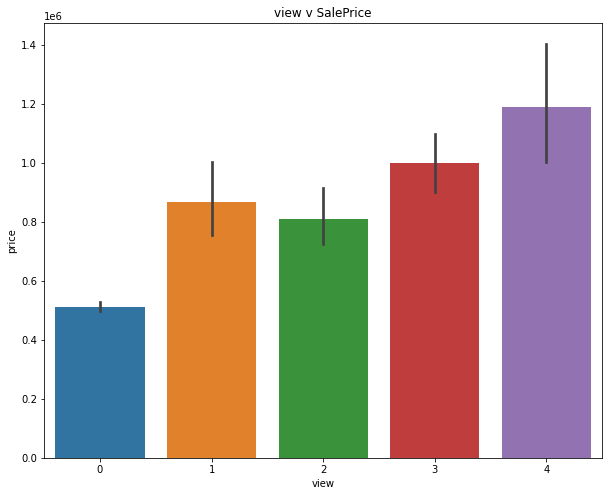

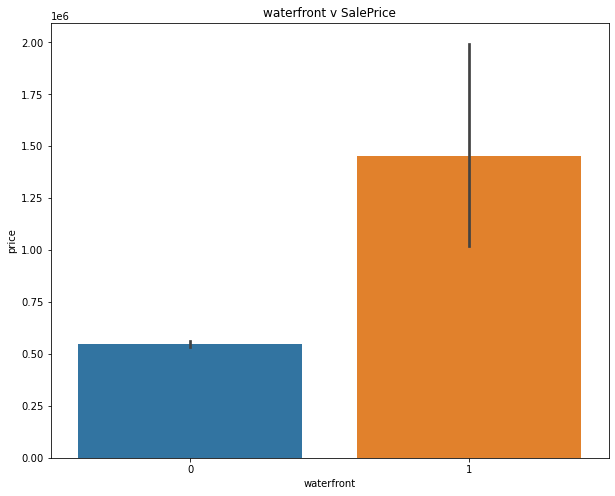

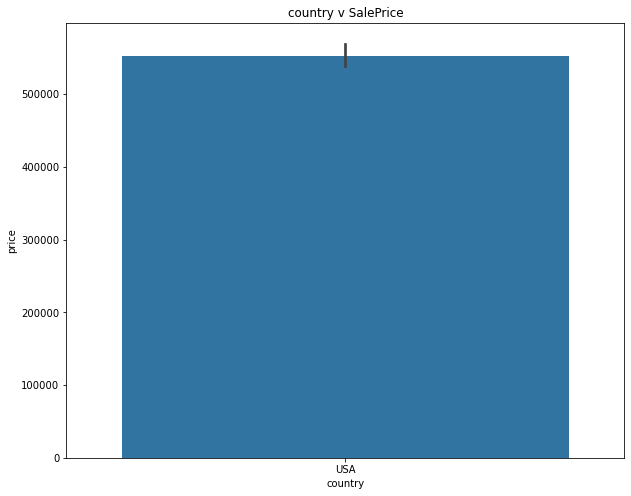

In [ ]:
#plot the best three score
for i in best_R:
    plt.figure(figsize=(10, 8))
    sns.barplot(x=df[i], y=df['price'])
    plt.title(f'{i} v SalePrice')
    plt.show()

The price's more effect by the view if view takes more score the price become up and the same thing with waterfront it is an effect, but not much and the result of R show the result negative effect with country

### Encode categorical variables using ColumnTransformer and pipeline.

In [ ]:
#select categorical variables
categorical_features = X_train.select_dtypes('object').columns

In [ ]:
# import Pipeline
from sklearn.pipeline import Pipeline
# pipline contain SimpleImputer and OneHotEncoder to deal categorical variables
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
           ("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

In [ ]:
# fit_transform or transform. The output of this step is a set of categorical variable.

col_transformer = ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

### For Linear Regression evaluation, use (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. IS scaling the data (within the pipeline) with StandardScaler effective?

In [ ]:
# import the model Ridge, Lasso, ElasticNet
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
# create Pipeline for each models
model1 = Pipeline(
    steps=[
        ("preprocessor", col_transformer),
        ("ols",LinearRegression())])

model2 = Pipeline(
    steps=[
        ("preprocessor", col_transformer),
        ("ridge",Ridge())])
model3 = Pipeline(
    steps=[
        ("preprocessor", col_transformer),
        ("lasso",Lasso())])
model4=  Pipeline(
    steps=[
        ("preprocessor", col_transformer),
        ("elastic",ElasticNet())])

In [ ]:
# Accuracy mean score for models
ols_scores = cross_val_score(model1, X_train, y_train , cv=5 )
print("Ordinary least squares",ols_scores.mean())

Ridge_scores  = cross_val_score(model2, X_train, y_train , cv=5)
print("Ridge",Ridge_scores.mean())

Lasso_score = cross_val_score(model3, X_train, y_train , cv=5 )
print("Lasso",Lasso_score.mean())

ElasticNet_score = cross_val_score(model4, X_train, y_train , cv=5 )
print("ElasticNet",ElasticNet_score.mean())


Ordinary least squares 0.5539283756581215
Ridge 0.5613712909323482
Lasso 0.5787376584030407
ElasticNet 0.4359317605401607


In [ ]:
# StandardScaler process for numric varabiles
# select the numbers varabiles
numeric_features = X_train.select_dtypes('number').columns

In [ ]:
# numric transformer StandardScaler and SimpleImputer
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())]
)

In [ ]:
# fit_transform or transform. The output of this step is a set of categorical variable and numric variable

col_transformer = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
# create Pipeline for each models after StandardScaler

model1 = Pipeline(
    steps=[
        ("preprocessor", col_transformer),
        ("ols",LinearRegression())])

model2 = Pipeline(
    steps=[
        ("preprocessor", col_transformer),
        ("ridge",Ridge())])
model3 = Pipeline(
    steps=[
        ("preprocessor", col_transformer),
        ("lasso",Lasso())])
model4=  Pipeline(
    steps=[
        ("preprocessor", col_transformer),
        ("elastic",ElasticNet())])

In [ ]:
# Accuracy mean score for models after scaling

ols_scores = cross_val_score(model1, X_train, y_train , cv=5)
print("Ordinary least squares",ols_scores.mean())

Ridge_scores  = cross_val_score(model2, X_train, y_train , cv=5)
print("Ridge",Ridge_scores.mean())

Lasso_score = cross_val_score(model3, X_train, y_train , cv=5 )
print("Lasso",Lasso_score.mean())

ElasticNet_score = cross_val_score(model4, X_train, y_train , cv=5 )
print("ElasticNet",ElasticNet_score.mean())

Ordinary least squares 0.5532843761835176
Ridge 0.5614539001697572
Lasso 0.5780336732574355
ElasticNet 0.4232089802744244


No, it is not effective. LinearRegression, Ridge, Lasso it is exact not change, but ElasticNet, the score before scaling is better

### By Tuning the parameters of the models using GridSearchCV the results might improve. Kindly Approve it?

In [ ]:
# import the GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# assign parameters for each model
lasso_params = {'lasso__alpha': np.logspace(-3, 0, 13)}
ridge_params = {'ridge__alpha':np.logspace(-3, 3, 13)}
elastic_params = {
    'elastic__alpha': np.logspace(-4, -1, 10),
    'elastic__l1_ratio': [0.01, .1, .5, .9, .98, 1]
}

In [ ]:
#  Tuning the Ridge model by enter different parameter
grid_search_ridge = GridSearchCV(model2, ridge_params, cv=5)
grid_search_ridge.fit(X_train, y_train)
# result of average score
print(grid_search_ridge.score(X_test, y_test))
# result of best parameter
print(grid_search_ridge.best_params_)
# result of best score
print(grid_search_ridge.best_score_)

0.13607503904305518
{'ridge__alpha': 3.1622776601683795}
0.5634388209666572


In [ ]:
grid_search_lasso = GridSearchCV(model3, lasso_params, cv=5)
grid_search_lasso.fit(X_train, y_train)
print(grid_search_lasso.score(X_test, y_test))
print(grid_search_lasso.best_params_)
print(grid_search_lasso.best_score_)

0.13918584166495762
{'lasso__alpha': 1.0}
0.5780336732574355


In [ ]:
grid_search_elastic = GridSearchCV(model4, elastic_params, cv=5)
grid_search_elastic.fit(X_train, y_train)
print(grid_search_elastic.score(X_test, y_test))
print(grid_search_elastic.best_params_)
print(grid_search_elastic.best_score_)

0.13570642678515155
{'elastic__alpha': 0.1, 'elastic__l1_ratio': 0.98}
0.5639387588208404


The result is slightly improved in Ridge and Lasso, but it improved  a lot in ElastiNet before tuning the result is 0.423 after
tuning become 0.563

### By visualizing the coefficients of the resulting models. Are they aligned with the rank of features importance?

In [ ]:
# categorical2 contain categrical variables in x train
categorical2 = X_train.dtypes == object

In [ ]:
# nummric and categrical transformer
cont_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())])
ct_onehot_sd = ColumnTransformer([("cat", OneHotEncoder(handle_unknown='ignore'),
                                   categorical2),
                                  ("norm", cont_transformer,  ~categorical2)])

In [ ]:
# apply fit_transform on x_train convert categrical by one hot encoder
ct_onehot_sd.fit_transform(X_train)

# get the name feature of categrical
features = ct_onehot_sd.named_transformers_['cat'].get_feature_names()

# convert categrical features to list
cat_lst = features.tolist()

# continuous list
continuous_lst = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


In [ ]:
# by best estimator from grid search take the best coefficients of model
ridge_coefficients = grid_search_ridge.best_estimator_.named_steps['ridge'].coef_

# feature names contain categrical and continuous list
ridge_feature_names = continuous_lst + cat_lst

# dictionaries are ordered collections, meaning they keep their elements in the same order in which they
#were introduced. If you take advantage of this feature,
#then you can use the Python zip() function to iterate through multiple dictionaries in a safe and coherent way
ridge_feature_importance = dict(zip(ridge_feature_names, ridge_coefficients))


Text(0, 0.5, 'Coefficients')

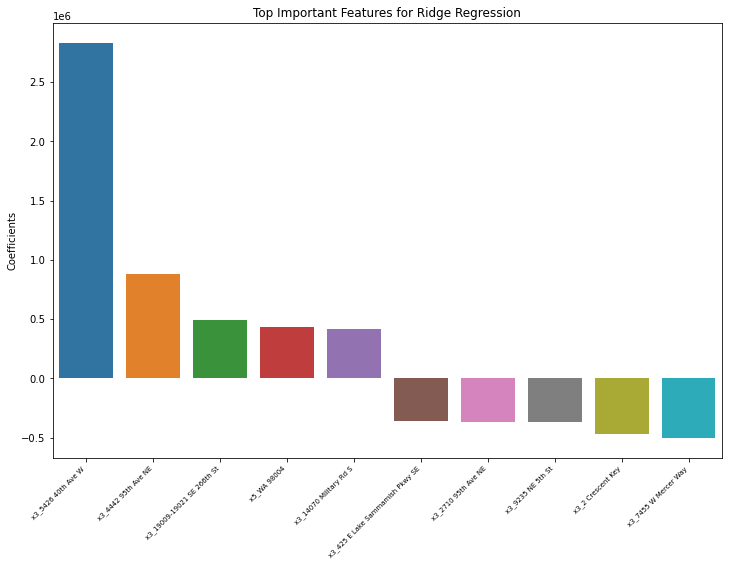

In [ ]:
# stored the feature_importance sequence to sort list in top_scores ,the sort iterates over the dictionary keys,
# using the number of word occurrences as a sort key,True will sort descending
ridge_top_scores = sorted(ridge_feature_importance, key=ridge_feature_importance.get, reverse=True)

# create empty list for x and y to plot
ridge_x = []
ridge_y = []
# top 5 and the last 5 score
for col in ridge_top_scores[:5] + ridge_top_scores[-5:]:
    ridge_x.append(col) # Features
    ridge_y.append(ridge_feature_importance[col]) # Coefficients

# plot
plt.figure(figsize=(12, 8))
sns.barplot(x=ridge_x, y=ridge_y)
plt.title('Top Important Features for Ridge Regression')
#plt.xlabel('Features')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small',
)
plt.ylabel('Coefficients')


In [ ]:
lasso_coefficients = grid_search_lasso.best_estimator_.named_steps['lasso'].coef_
lasso_feature_names = continuous_lst + cat_lst
lasso_feature_importance = dict(zip(lasso_feature_names, lasso_coefficients))

Text(0, 0.5, 'Coefficients')

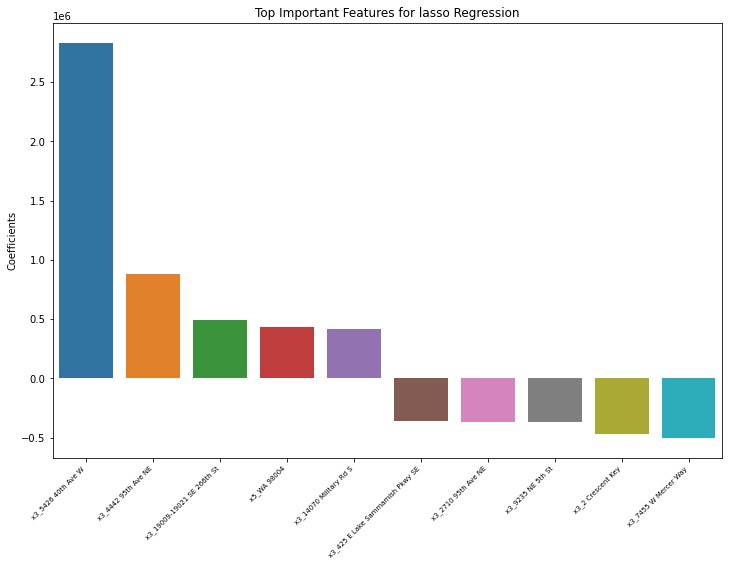

In [ ]:
lasso_top_scores = sorted(lasso_feature_importance, key=lasso_feature_importance.get, reverse=True)

lasso_x = []
lasso_y = []
for col in lasso_top_scores[:5] + lasso_top_scores[-5:]:
    lasso_x.append(col)
    lasso_y.append(lasso_feature_importance[col])

plt.figure(figsize=(12, 8))
sns.barplot(x=ridge_x, y=ridge_y)
plt.title('Top Important Features for lasso Regression')
#plt.xlabel('Features')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small',
)
plt.ylabel('Coefficients')


In [ ]:
elastic_coefficients = grid_search_elastic.best_estimator_.named_steps['elastic'].coef_
elastic_feature_names = continuous_lst + cat_lst
elastic_feature_importance = dict(zip(elastic_feature_names, elastic_coefficients))

Text(0, 0.5, 'Coefficients')

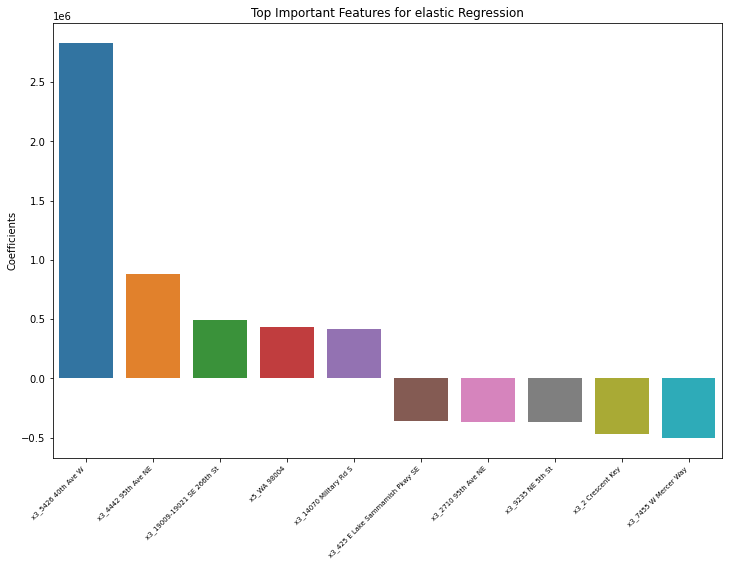

In [ ]:
elastic_top_scores = sorted(elastic_feature_importance, key=elastic_feature_importance.get, reverse=True)

lasso_x = []
lasso_y = []
for col in elastic_top_scores[:5] + lasso_top_scores[-5:]:
    lasso_x.append(col)
    lasso_y.append(lasso_feature_importance[col])

plt.figure(figsize=(12, 8))
sns.barplot(x=ridge_x, y=ridge_y)
plt.title('Top Important Features for elastic Regression')
#plt.xlabel('Features')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small',
)
plt.ylabel('Coefficients')

All models have the same important features. the most crucial feature is x3_5425 4-th W